In [60]:
import csv
from itertools import islice
from collections import defaultdict
import matplotlib.pyplot as plt

import torch
from torchvision import models, datasets, transforms

In [3]:
%ls ..

LICENSE           all_gans_inf.csv  mturk_manual/     wgan_experiment/
README.md         distances/        simple-amt/


In [30]:
dataset_counts = defaultdict(int)
img_counts = defaultdict(lambda : defaultdict(int))
unique_imgs = defaultdict(set)

with open('../all_gans_inf.csv') as f:
    reader = csv.DictReader(f)
    for row in islice(reader, None):
        img = row['img']        
#         dataset_name = img[:img.index('/')]
        split_name = img.split('/')
        assert(len(split_name) == 2)
        dataset_name, img_name = split_name
        dataset_counts[dataset_name] += 1
        img_counts[dataset_name][img_name] += 1
unique_imgs = {dataset: len(img_counts[dataset]) for dataset in img_counts}

In [23]:
# count of total labels per dataset
dataset_counts

defaultdict(int,
            {'ffhq500': 7837,
             'styleganwithtrunc5000': 4409,
             'stylegannotrunc5000': 3406,
             'celeba500': 17722,
             'wgangp5000': 6673,
             'styleganceleba5000': 4797,
             'began5000': 3235,
             'progan5000': 2986})

In [31]:
# count of unique images with labels per dataset
unique_imgs


{'ffhq500': 50,
 'styleganwithtrunc5000': 1621,
 'stylegannotrunc5000': 2459,
 'celeba500': 66,
 'wgangp5000': 4251,
 'styleganceleba5000': 3103,
 'began5000': 2397,
 'progan5000': 2233}

In [33]:
inception_net = models.inception_v3(pretrained=True)

/Users/alexkolchinski/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/alexkolchinski/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
Downloading: "https://download.pytorch.org/models/inception_v3_google-1a9a5a14.pth" to /Users/alexkolchinski/.cache/torch/checkpoints/inception_v3_google-1a9a5a14.pth
100%|██████████| 108857766/108857766 [00:13<00:00, 8364413.56it/s] 


In [34]:
inception_net

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [77]:
inception_transforms = transforms.Compose([
            transforms.Resize(299),
            #transforms.CenterCrop(constants.INPUT_SIZE),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

In [78]:
progan_images = datasets.ImageFolder('progan_imgs/', inception_transforms)

In [79]:
progan_images

Dataset ImageFolder
    Number of datapoints: 300
    Root location: progan_imgs/

In [80]:
progan_loader = torch.utils.data.DataLoader(
        progan_images, batch_size=1, shuffle=True, num_workers=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([1, 3, 299, 299]) tensor([0])


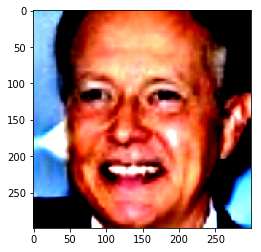

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor(-30.0005, grad_fn=<SumBackward0>)
torch.Size([1, 3, 299, 299]) tensor([0])


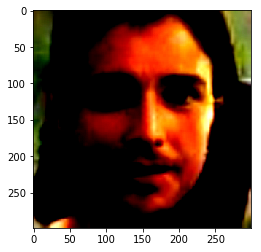

tensor(-30.2595, grad_fn=<SumBackward0>)


In [86]:
inception_net.eval()
mean=torch.tensor([0.485, 0.456, 0.406]).reshape(1,-1,1,1)
std=torch.tensor([0.229, 0.224, 0.225]).reshape(1,-1,1,1)
for x,y in islice(progan_loader,2):
    print(x.shape, y)
    plt.imshow((x).squeeze().permute(1, 2, 0))
    plt.show()
    out = inception_net(x)
    print(out.sum())
    